In [ ]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from pathlib import Path
import numpy as np
import pandas as pd

In [2]:
CWD = Path.cwd().resolve()
project_root = Path.cwd().parents[3]
sys.path.append(str(project_root))

from parameters.parameters_paths import PATH_TO_CROSS_SECTIONS
from parameters.parameters_materials import *
from src.utils.pre_processing.pre_processing import *
from src.utils.post_preocessing.post_processing import *
from src.utils.common.isotope import *

In [4]:
FUEL_UO2_MATERIAL

Material
	ID             =	13
	Name           =	UO2 Fuel
	Temperature    =	None
	Density        =	10.97 [g/cm3]
	Volume         =	None [cm^3]
	Depletable     =	True
	S(a,b) Tables  
	Nuclides       
	U235           =	0.1975       [ao]
	U238           =	0.8025       [ao]
	O16            =	1.9952412    [ao]
	O17            =	0.000758     [ao]
	O18            =	0.0040008    [ao]

In [5]:
atom_densities = FUEL_UO2_MATERIAL.get_nuclide_atom_densities()
density_UO2 = FUEL_UO2_MATERIAL.density

In [6]:
fraction_mass_u_235 = atom_densities['U235']
fraction_mass_u_238 = atom_densities['U238']

In [7]:
enrichment_factor = fraction_mass_u_235 / (fraction_mass_u_235 + fraction_mass_u_238)
print(f"Enrichment factor: {enrichment_factor*100:.2f} %")

Enrichment factor: 19.75 %


In [8]:
RADIUS_FUEL = 0.025 # cm 
VOLUME_FUEL = (4/3) * np.pi * RADIUS_FUEL**3 # cm^3
MASS_FUEL = density_UO2 * VOLUME_FUEL # g

In [9]:
MASS_FUEL

0.0007179848210391674

In [10]:
mass_235U = atom_densities['U235'] * VOLUME_FUEL 
mass_238U = atom_densities['U238'] * VOLUME_FUEL

In [11]:
mass_235U

np.float64(3.169174450037913e-07)

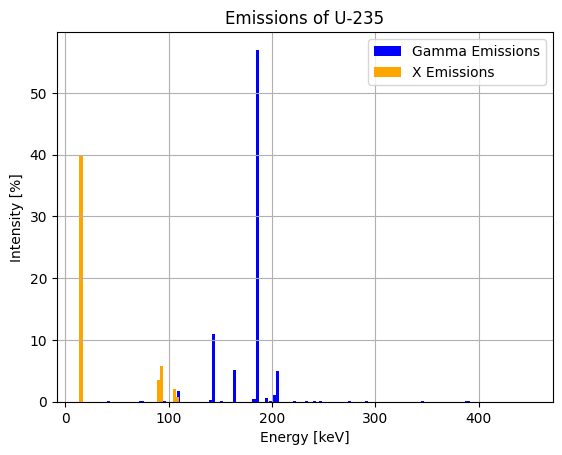

In [12]:
uranium_235 = Radionuclide_lara("U-235")
energy_235U, intensity_235U, types = uranium_235.get_rays_emission_data(photon_only=True)
uranium_235.plot_emissions(saving_figure=False, photon_only=True, log_scale=False)
activity_235U = uranium_235.get_activity(mass_235U)

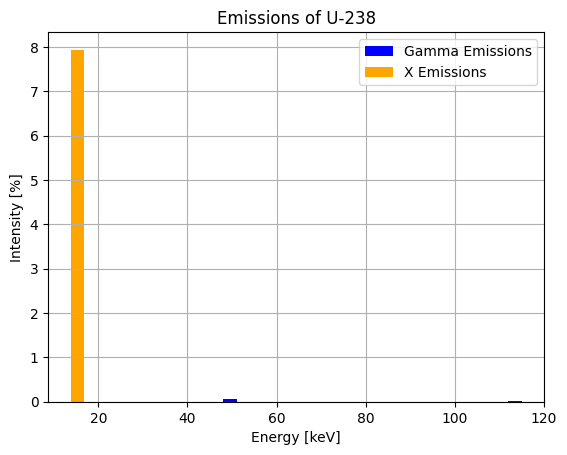

In [13]:
uranium_238 = Radionuclide_lara("U-238")
energy_238U, intensity_238U, types = uranium_238.get_rays_emission_data(photon_only=True)
uranium_238.plot_emissions(saving_figure=False, photon_only=True, log_scale=False, width_factor=30)
activity_238U = uranium_238.get_activity(mass_238U)

In [14]:
energy_total_uranium = energy_238U
energy_total_uranium = np.append(energy_total_uranium, energy_235U)
intensity_total_uranium = intensity_238U
intensity_total_uranium = np.append(intensity_total_uranium, intensity_235U)

In [15]:
energy_total_uranium

array([ 15.311 ,  49.55  ,  89.954 ,  93.351 , 105.554 , 108.9687,
       113.5   ,  15.311 ,  19.592 ,  31.6   ,  41.4   ,  42.01  ,
        51.21  ,  54.1   ,  54.25  ,  64.45  ,  72.7   ,  74.94  ,
        89.954 ,  93.351 ,  96.09  ,  97.    , 105.554 , 108.9687,
       109.19  , 115.45  , 120.35  , 136.55  , 140.76  , 142.4   ,
       143.767 , 150.936 , 163.356 , 173.    , 182.62  , 185.72  ,
       194.94  , 198.894 , 202.12  , 205.316 , 215.28  , 221.386 ,
       228.76  , 233.5   , 240.88  , 246.83  , 255.365 , 266.47  ,
       275.35  , 275.49  , 281.42  , 282.94  , 289.56  , 291.65  ,
       301.7   , 310.69  , 317.1   , 343.5   , 345.92  , 350.    ,
       356.03  , 387.84  , 390.27  , 410.29  , 448.4   ])

In [16]:
intensity_total_uranium

array([7.940e-02, 6.970e-04, 1.090e-05, 1.800e-05, 6.300e-06, 2.100e-06,
       1.740e-04, 4.000e-01, 6.000e-05, 1.700e-04, 2.900e-04, 5.600e-04,
       3.400e-04, 1.150e-05, 2.850e-04, 1.800e-04, 1.160e-03, 5.100e-04,
       3.560e-02, 5.750e-02, 9.100e-04, 1.600e-04, 2.050e-02, 6.900e-03,
       1.660e-02, 3.000e-04, 2.600e-04, 1.200e-04, 2.000e-03, 5.100e-05,
       1.094e-01, 9.000e-04, 5.080e-02, 6.000e-05, 3.900e-03, 5.700e-01,
       6.300e-03, 3.600e-04, 1.080e-02, 5.020e-02, 2.900e-04, 1.180e-03,
       7.400e-05, 3.800e-04, 7.400e-04, 5.500e-04, 7.400e-05, 7.800e-05,
       5.100e-04, 3.200e-04, 6.300e-05, 6.300e-05, 7.400e-05, 4.000e-04,
       5.300e-05, 9.400e-05, 1.100e-05, 3.200e-05, 4.000e-04, 6.000e-05,
       5.300e-05, 4.000e-04, 4.000e-04, 3.200e-05, 1.100e-05])

In [17]:
activity_238U + activity_235U

np.float64(0.04135559640637075)